<a href="https://colab.research.google.com/github/ShrikantKGIT/distributedML/blob/main/GNN1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/50
1/1 [==============================] - 1s 702ms/step - loss: 47.1560
Epoch 2/50
1/1 [==============================] - 0s 9ms/step - loss: 44.6163
Epoch 3/50
1/1 [==============================] - 0s 9ms/step - loss: 41.8684
Epoch 4/50
1/1 [==============================] - 0s 9ms/step - loss: 40.5279
Epoch 5/50
1/1 [==============================] - 0s 9ms/step - loss: 37.7671
Epoch 6/50
1/1 [==============================] - 0s 9ms/step - loss: 35.4683
Epoch 7/50
1/1 [==============================] - 0s 8ms/step - loss: 33.6482
Epoch 8/50
1/1 [==============================] - 0s 7ms/step - loss: 32.4190
Epoch 9/50
1/1 [==============================] - 0s 10ms/step - loss: 30.4316
Epoch 10/50
1/1 [==============================] - 0s 11ms/step - loss: 27.9915
Epoch 11/50
1/1 [==============================] - 0s 9ms/step - loss: 26.7216
Epoch 12/50
1/1 [==============================] - 0s 11ms/step - loss: 25.7555
Epoch 13/50
1/1 [==============================] - 0s 11

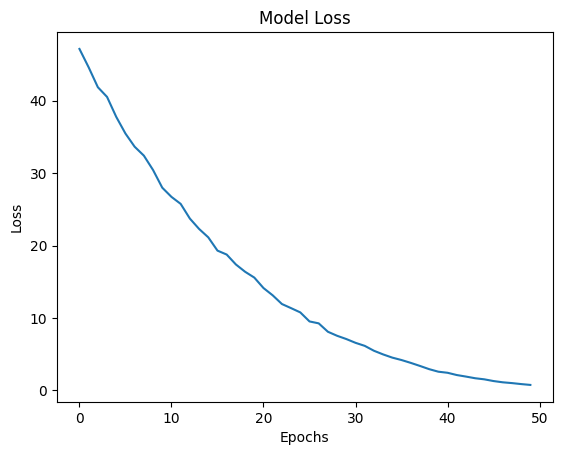

In [7]:
import tensorflow as tf
from tensorflow.keras import layers, Model
import numpy as np
import networkx as nx
import random
import matplotlib.pyplot as plt

# Generating 1000 sample transactions with random amounts between 10 and 100
transactions = [
    (f"Node_{random.randint(1, 50)}", f"Node_{random.randint(1, 50)}", {'amount': random.randint(10, 100)})
    for _ in range(1000)
]

# Create a pandas DataFrame from the generated transactions
df = pd.DataFrame(transactions, columns=['source', 'target', 'amount'])

# Create a directed graph
G = nx.from_pandas_edgelist(df, 'source', 'target', ['amount'], create_using=nx.DiGraph())

# Convert the NetworkX graph to adjacency matrix with float32 data type
adj_matrix = nx.adjacency_matrix(G).astype(np.float32).toarray()

# Create node features (random features for demonstration)
num_nodes = adj_matrix.shape[0]
node_features = np.random.rand(num_nodes, 16).astype(np.float32)

# Define a simple Graph Convolutional Network (GCN) model using TensorFlow Keras
class SimpleGCN(Model):
    def __init__(self):
        super(SimpleGCN, self).__init__()
        self.dense1 = layers.Dense(32, activation='relu')
        self.dense2 = layers.Dense(16, activation='relu')

    def call(self, inputs):
        x, A = inputs
        x = tf.matmul(A, x)  # Graph convolution
        x = self.dense1(x)
        x = self.dense2(x)
        return x

# Instantiate the GCN model
gcn_model = SimpleGCN()

# Compile the model
gcn_model.compile(optimizer='adam', loss='mse')

# Train the model (input: node features, adjacency matrix; output: node embeddings)
history = gcn_model.fit([node_features, adj_matrix], node_features, epochs=50, batch_size=num_nodes, verbose=1)

# Extract node embeddings
node_embeddings = gcn_model([node_features, adj_matrix]).numpy()

# Visualize node embeddings (2D visualization using PCA, t-SNE, or other methods)
# Visualization code here...

# Optional: Plot loss curve during training
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()
